In [95]:
import fitsio as fio
import numpy as np
import proplot as pplt
from matplotlib import pyplot as plt
import meds
import glob
import matplotlib.patches as patches
%matplotlib inline

In [2]:
truth = fio.read('/global/cscratch1/sd/myamamot/imsim/2022_09_19_v013_truedet_pizza_mdet/g1002/true_positions/DES0433-2332-truepositions.fits')
coadd = fio.read('/global/cscratch1/sd/myamamot/imsim/2022_09_19_v013_truedet_pizza_mdet/g1002/des-pizza-slices-y6-v15/DES0433-2332/sources-r/OPS/multiepoch/Y6A1/r4939/DES0433-2332/p01/coadd/DES0433-2332_r4939p01_r.fits')
coadd_cat = fio.read('/global/cscratch1/sd/myamamot/imsim/2022_09_19_v013_truedet_pizza_mdet/g1002/des-pizza-slices-y6-v15/DES0433-2332/sources-r/OPS/multiepoch/Y6A1/r4939/DES0433-2332/p01/coadd/DES0433-2332_r4939p01_r_cat.fits')
pizza_meds = fio.FITS('/global/cscratch1/sd/myamamot/imsim/2022_09_19_v013_truedet_pizza_mdet/g1002/des-pizza-slices-y6-v15/DES0433-2332/DES0433-2332_r_des-pizza-slices-y6-v15_meds-pizza-slices.fits.fz')

In [96]:
d = fio.read('/global/cscratch1/sd/myamamot/imsim/2022_09_19_v013_truedet_pizza_mdet/g1002/des-pizza-slices-y6-v15/DES0433-2332/metadetect/DES0433-2332_metadetect-v7_mdetcat_part0000.fits')
mdet_mom='wmom'
mag_r = 30.0 - 2.5*np.log10(d[mdet_mom+"_band_flux_r"])
mag_i = 30.0 - 2.5*np.log10(d[mdet_mom+"_band_flux_i"])
mag_z = 30.0 - 2.5*np.log10(d[mdet_mom+"_band_flux_z"])
rmi = mag_r - mag_i
imz = mag_i - mag_z

msk = ( (d['mdet_step'] == 'noshear') &
        (d[mdet_mom+"_flags"] == 0) & 
        (d["mask_flags"] == 0) & 
        (d[mdet_mom+"_s2n"] > 10) & 
        (d["mfrac"] < 0.1) & 
        (d["shear_bands"] == '012'))

<ipython-input-96-d53ad76d94eb>:4: RuntimeWarning: invalid value encountered in log10
  mag_i = 30.0 - 2.5*np.log10(d[mdet_mom+"_band_flux_i"])
<ipython-input-96-d53ad76d94eb>:5: RuntimeWarning: invalid value encountered in log10
  mag_z = 30.0 - 2.5*np.log10(d[mdet_mom+"_band_flux_z"])


In [11]:
d.dtype

dtype([('slice_id', '>i8'), ('mdet_step', '<U7'), ('ra', '>f8'), ('dec', '>f8'), ('ra_noshear', '>f8'), ('dec_noshear', '>f8'), ('y_noshear', '>f8'), ('x_noshear', '>f8'), ('y', '>f8'), ('x', '>f8'), ('slice_y', '>f8'), ('slice_x', '>f8'), ('slice_y_noshear', '>f8'), ('slice_x_noshear', '>f8'), ('hpix_16384', '>i8'), ('hpix_16384_noshear', '>i8'), ('filename', '<U48'), ('tilename', '<U12'), ('mask_flags', '>i4'), ('mask_flags_noshear', '>i4'), ('nepoch_r', '>i4'), ('nepoch_i', '>i4'), ('nepoch_z', '>i4'), ('nepoch_eff_r', '>i4'), ('nepoch_eff_i', '>i4'), ('nepoch_eff_z', '>i4'), ('wmom_flags', '>i4'), ('wmom_psf_flags', '>i4'), ('wmom_psf_g_1', '>f8'), ('wmom_psf_g_2', '>f8'), ('wmom_psf_T', '>f8'), ('wmom_obj_flags', '>i4'), ('wmom_s2n', '>f8'), ('wmom_g_1', '>f8'), ('wmom_g_2', '>f8'), ('wmom_g_cov_1_1', '>f8'), ('wmom_g_cov_1_2', '>f8'), ('wmom_g_cov_2_2', '>f8'), ('wmom_T', '>f8'), ('wmom_T_flags', '>i4'), ('wmom_T_err', '>f8'), ('wmom_T_ratio', '>f8'), ('wmom_band_flux_flags_r', '

38383 40000


Text(0.5, 1.0, 'metadetect')

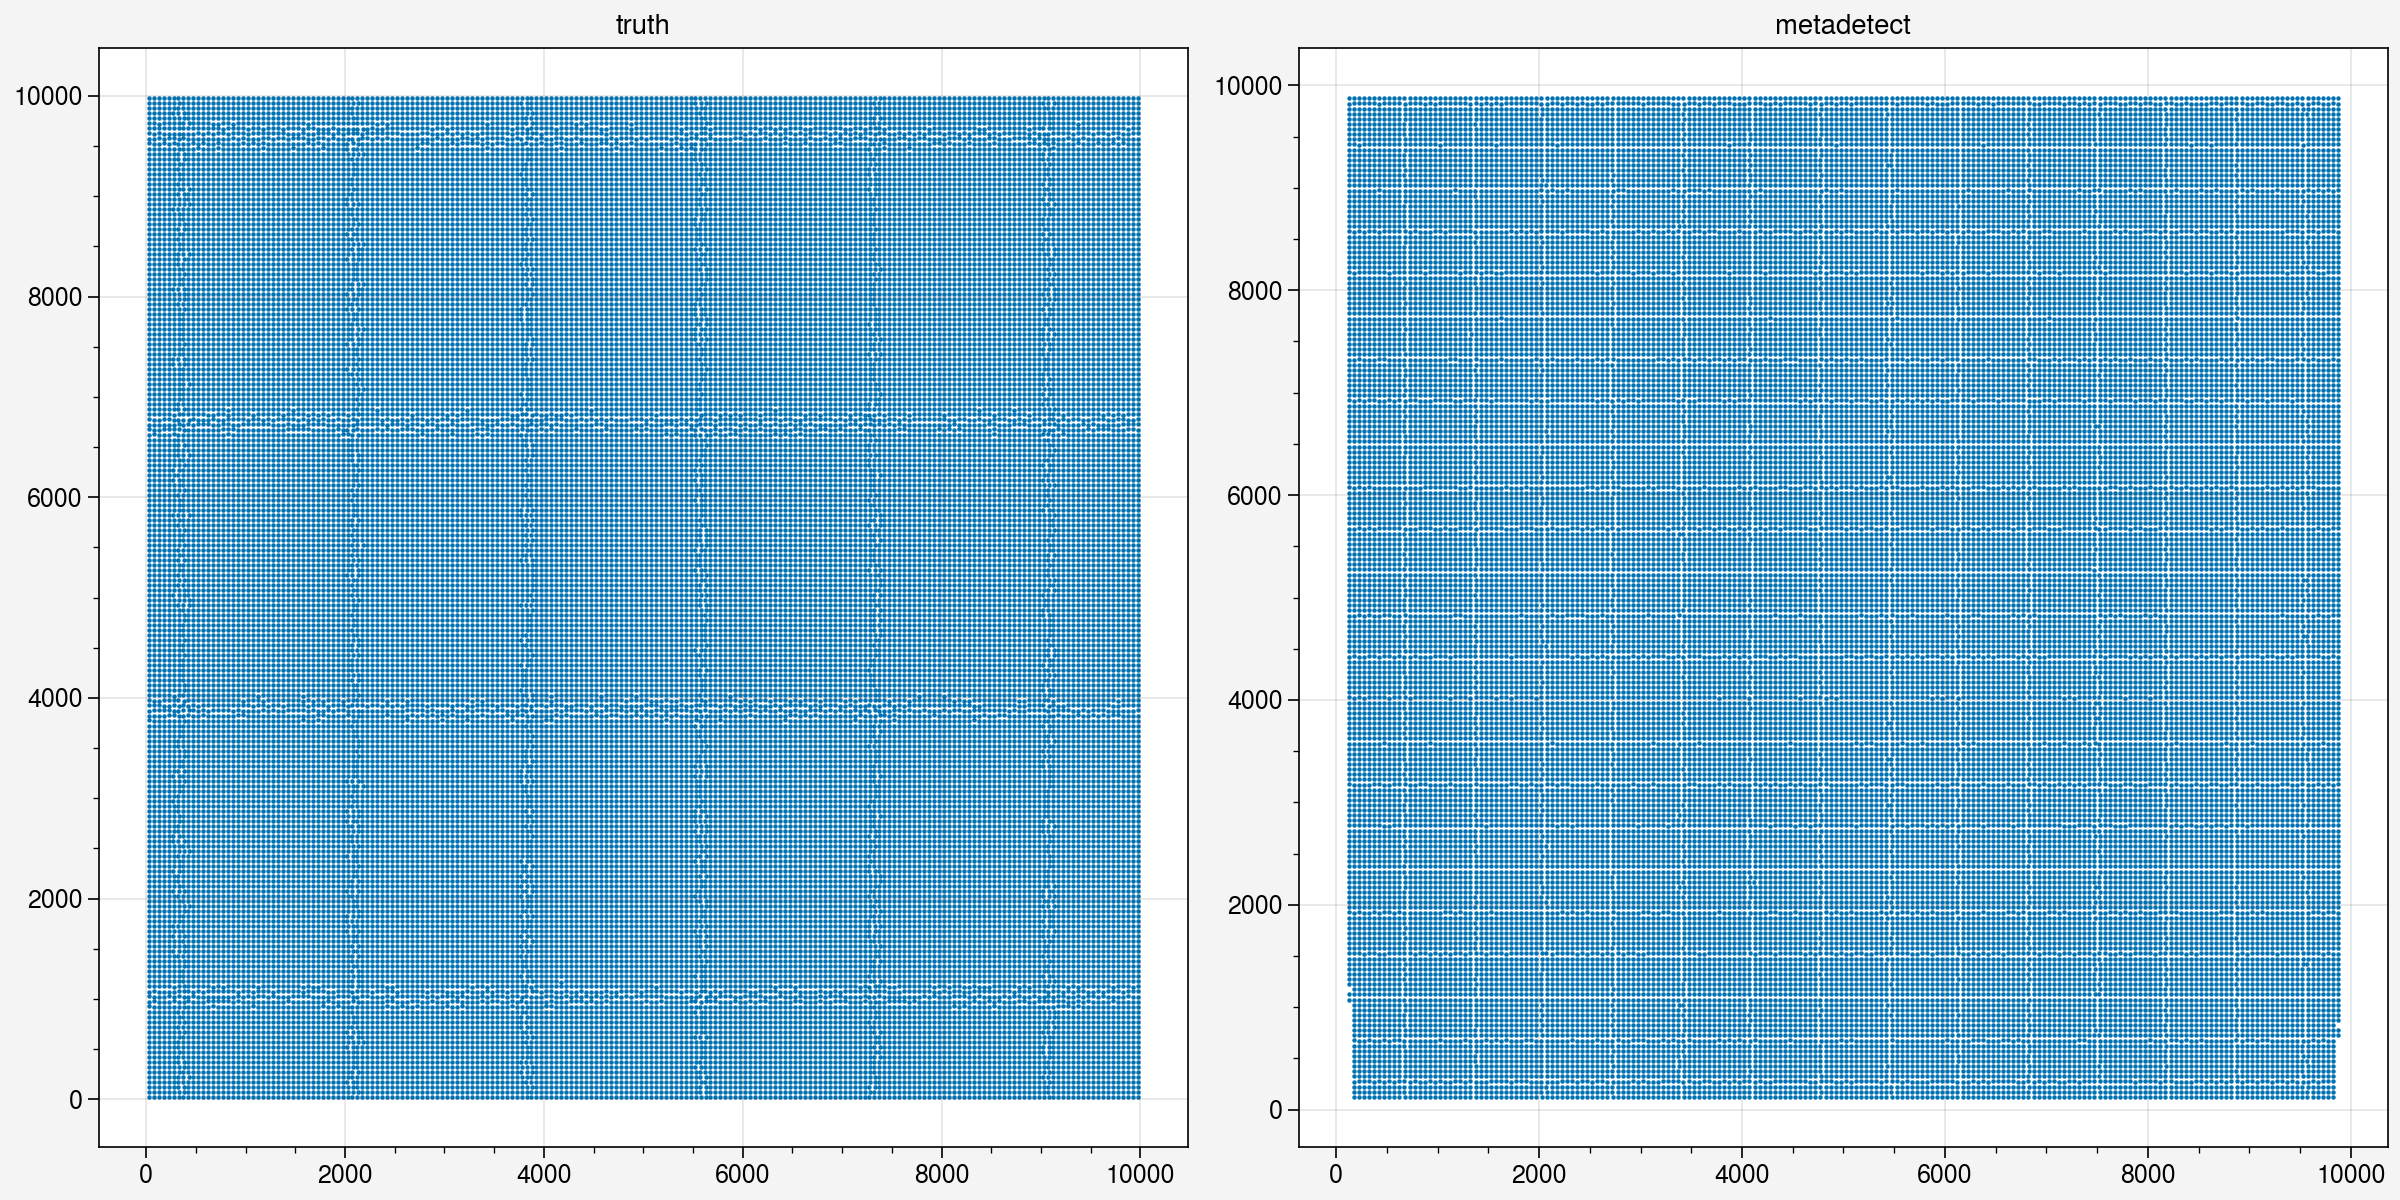

In [99]:
fig,ax = pplt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=False, sharey=False)
ax[0].scatter(truth['x'], truth['y'], s=1)
ax[0].set_title('truth')

d_msk = d[msk]
print(len(d_msk), len(truth))
ax[1].scatter(d_msk['x'], d_msk['y'], s=1)
ax[1].set_title('metadetect')

In [10]:
m = meds.MEDS('/global/cscratch1/sd/myamamot/imsim/2022_09_19_v013_truedet_pizza_mdet/g1002/des-pizza-slices-y6-v15/DES0433-2332/DES0433-2332_r_des-pizza-slices-y6-v15_meds-pizza-slices.fits.fz')

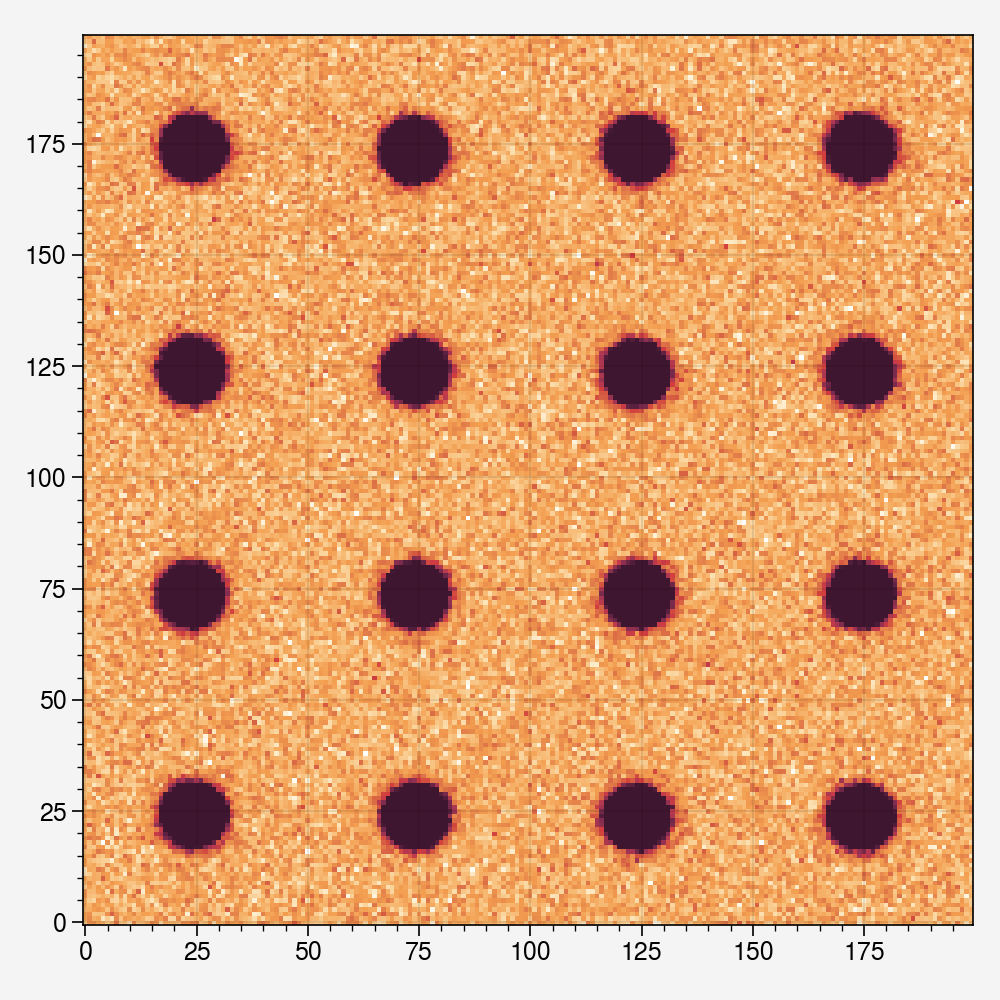

In [20]:
from astropy.visualization import LinearStretch, LogStretch
from astropy.visualization import ZScaleInterval, MinMaxInterval
from astropy.visualization import ImageNormalize
from astropy.io.fits import getdata

image_shape = 1
start = 300
object_index = image_shape**1
layout = np.arange(object_index).reshape(image_shape, image_shape)
fig,ax = plt.subplot_mosaic(layout, figsize=(5,5))
for i in range(object_index):
    image = m.get_cutout(start+i,0)
    norm = ImageNormalize(image, interval=ZScaleInterval(),
                      stretch=LinearStretch())
    ax[i].imshow(image, origin='lower', norm=norm)
    # ax[i].set_xticklabels([])
    # ax[i].set_yticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()

Text(0, 0.5, 'T')

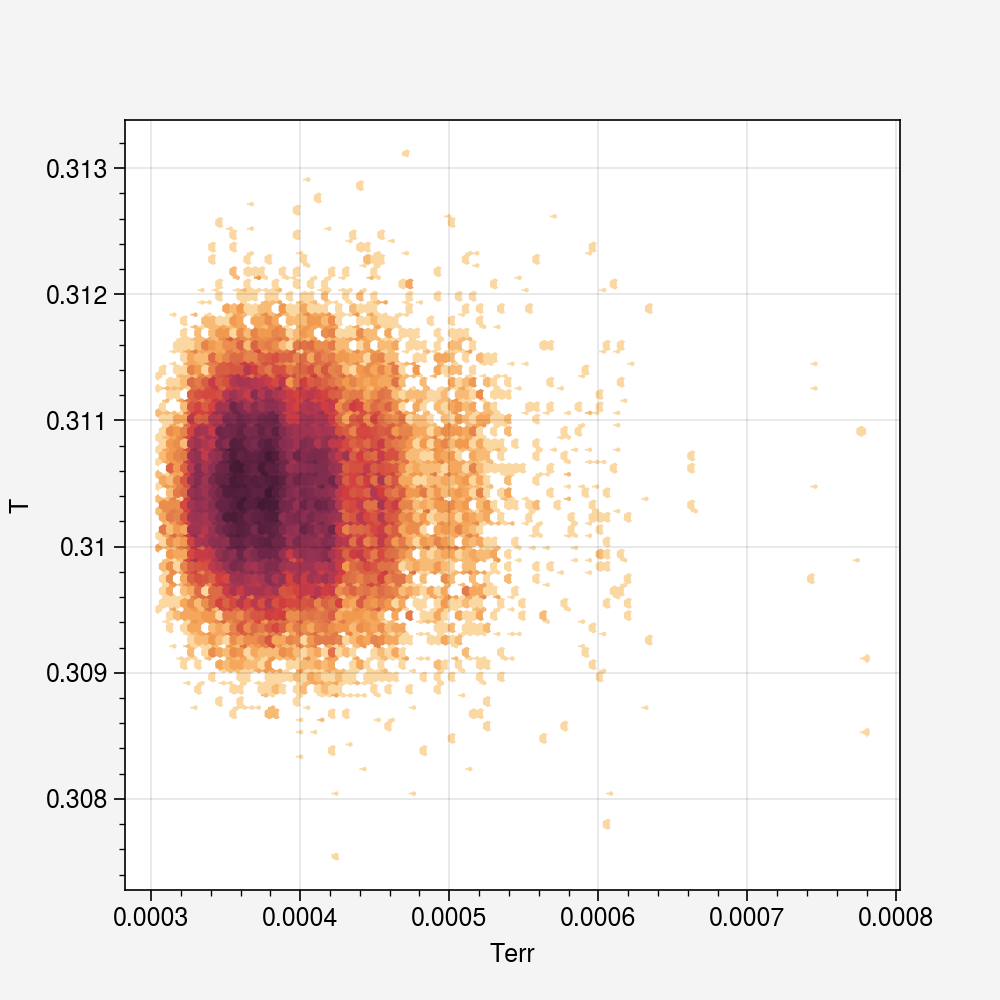

In [100]:
fig,ax = plt.subplots(figsize=(5,5))
ax.hexbin(d_msk['pgauss_T_err'], d_msk['pgauss_T'], bins='log')
ax.set_xlabel('Terr')
ax.set_ylabel('T')

Text(0, 0.5, '$g_2$')

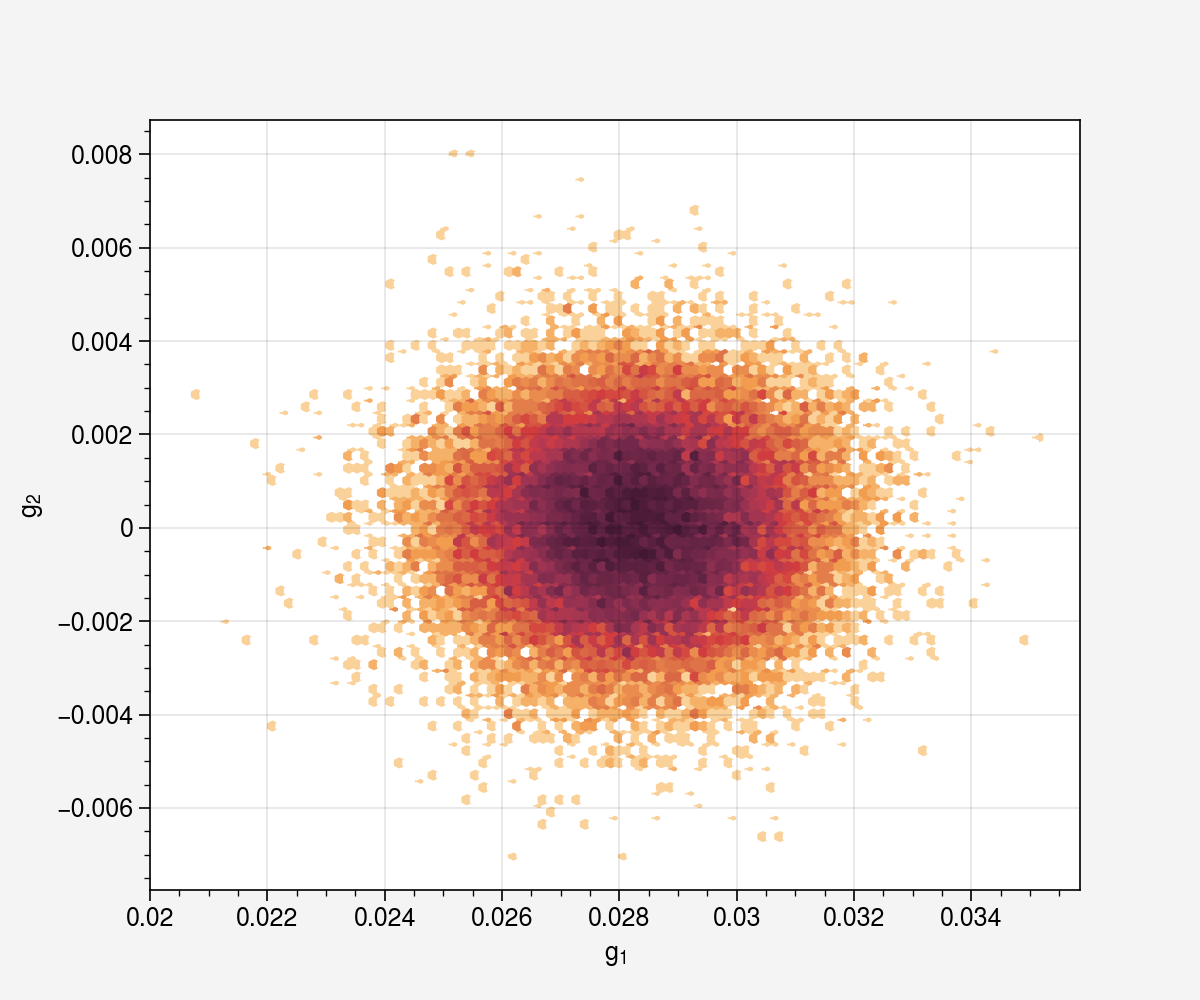

In [108]:
fig,ax = plt.subplots(figsize=(6,5))
ax.hexbin(d_msk['pgauss_g_1'], d_msk['pgauss_g_2'], bins='log')
ax.set_xlabel(r'$g_1$')
ax.set_ylabel(r'$g_2$')

Text(0.5, 0, '$g_1$')

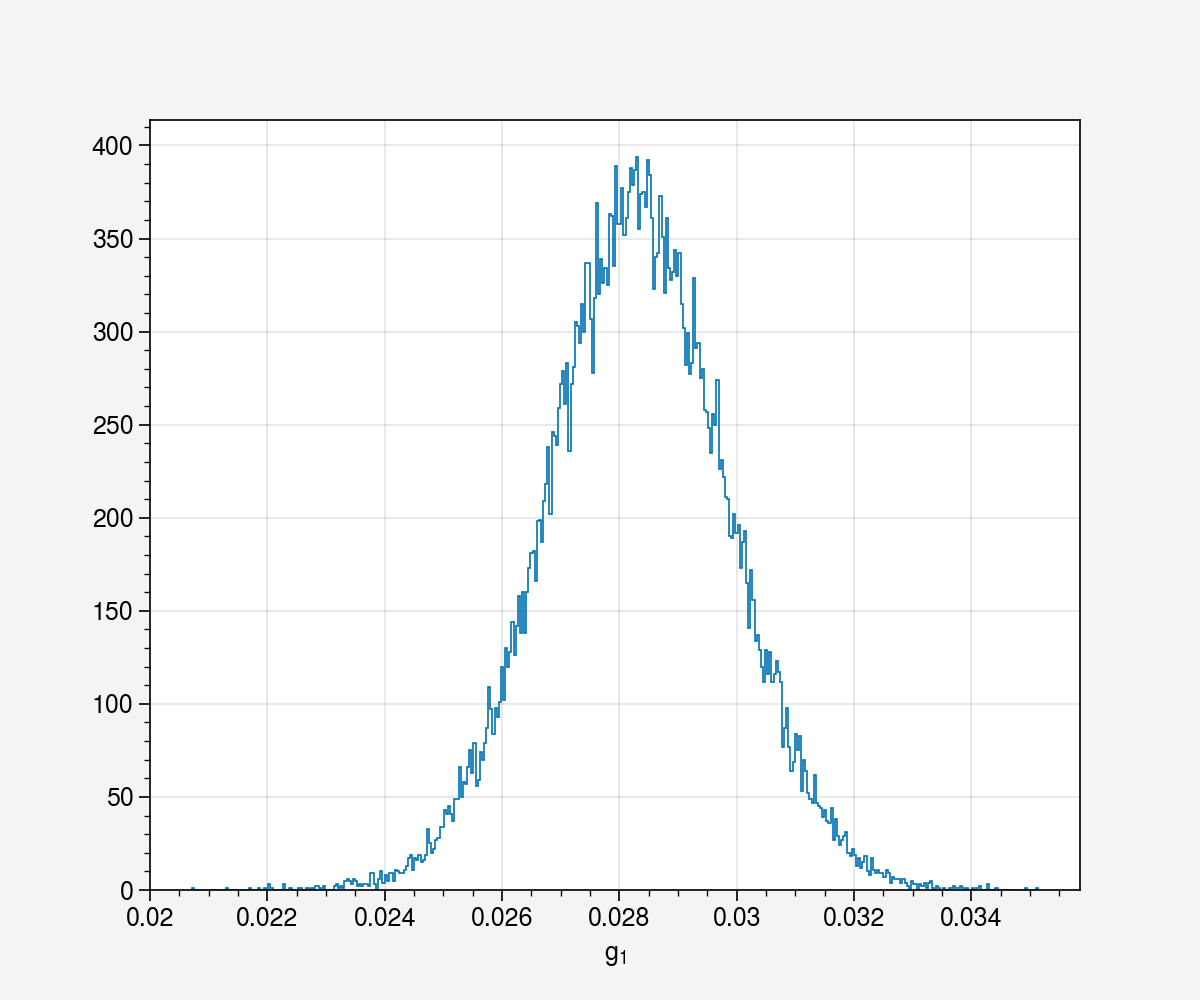

In [109]:
fig,ax = plt.subplots(figsize=(6,5))
ax.hist(d_msk['pgauss_g_1'], bins=400, histtype='step')
ax.set_xlabel(r'$g_1$')

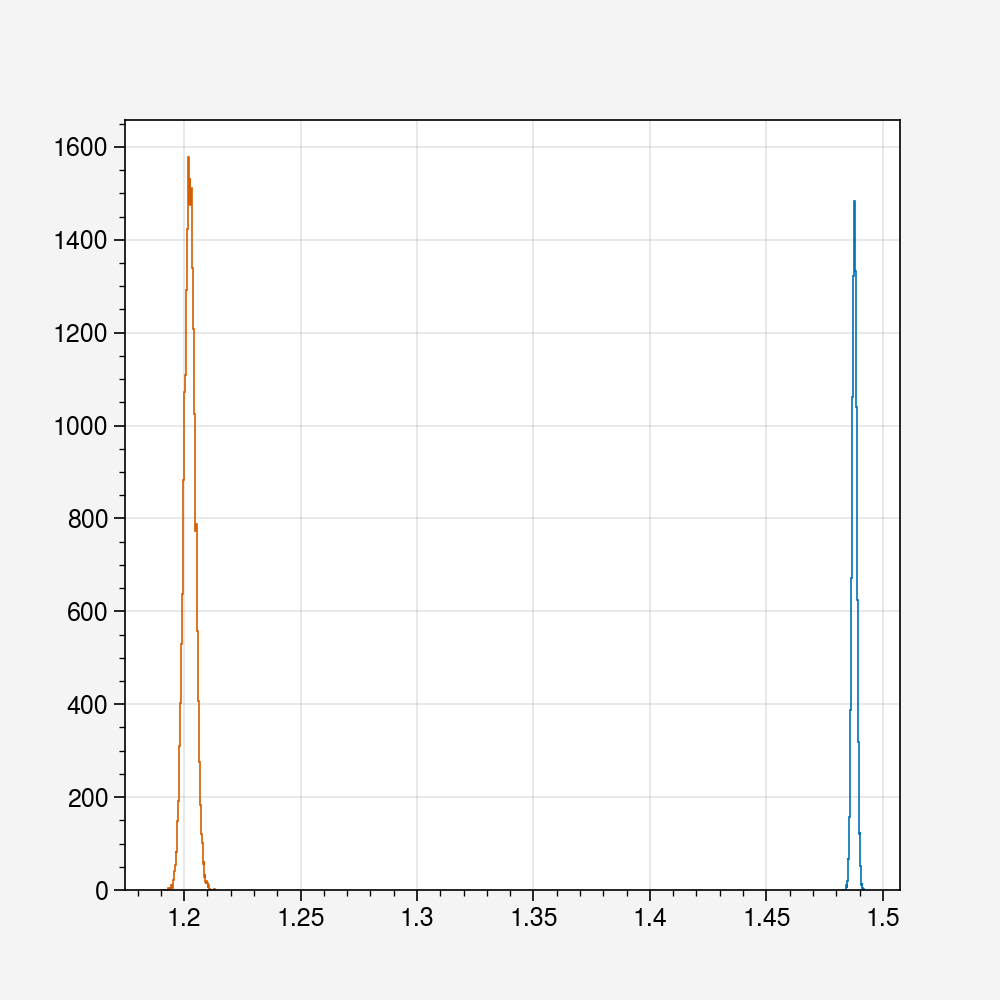

In [101]:
fig,ax = plt.subplots(figsize=(5,5))
h = ax.hist(d_msk['wmom_T_ratio'], bins=100, histtype='step')
h2 = ax.hist(d_msk['pgauss_T_ratio'], bins=100, histtype='step')

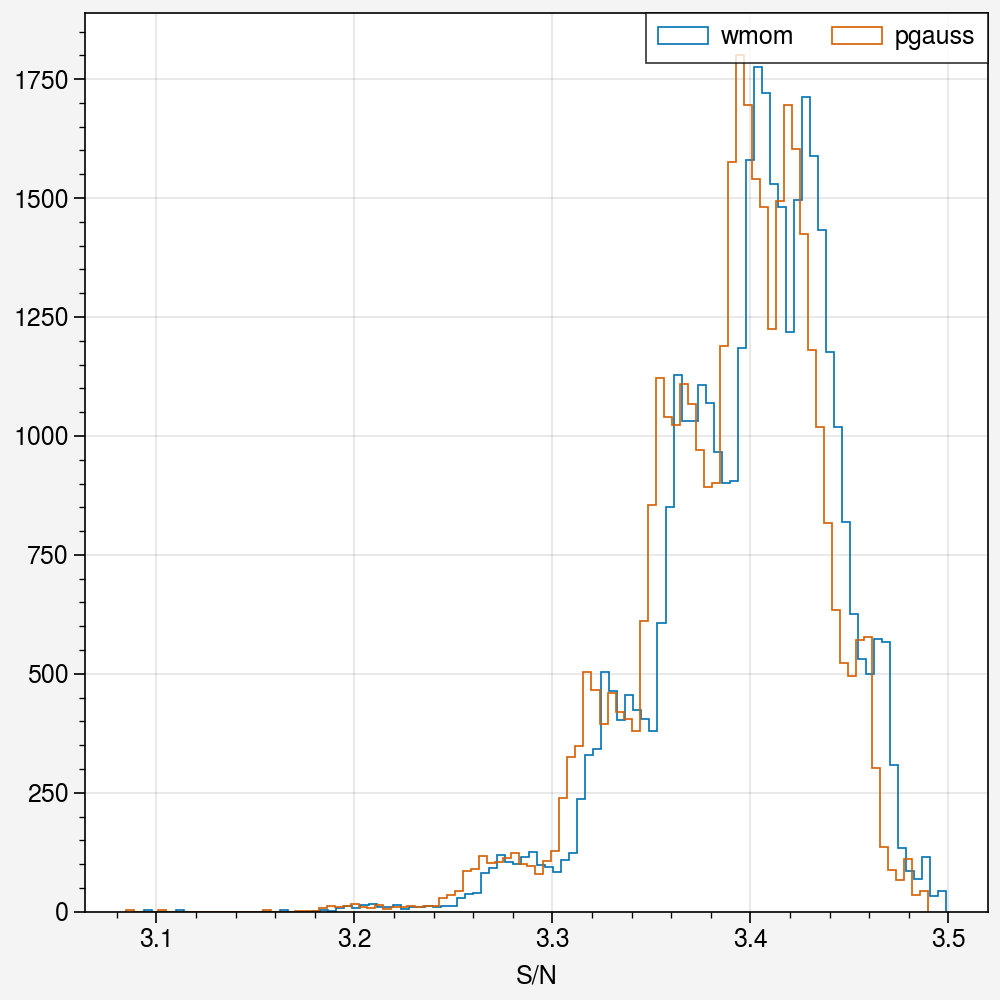

In [102]:
fig,ax = pplt.subplots(nrows=1, ncols=1, figsize=(5,5), sharex=False, sharey=False)
h = ax.hist(np.log10(d_msk['wmom_s2n']), bins=100, histtype='step', label='wmom')
h2 = ax.hist(np.log10(d_msk['pgauss_s2n']), bins=100, histtype='step', label='pgauss')
ax.set_xlabel('S/N')
ax.legend()

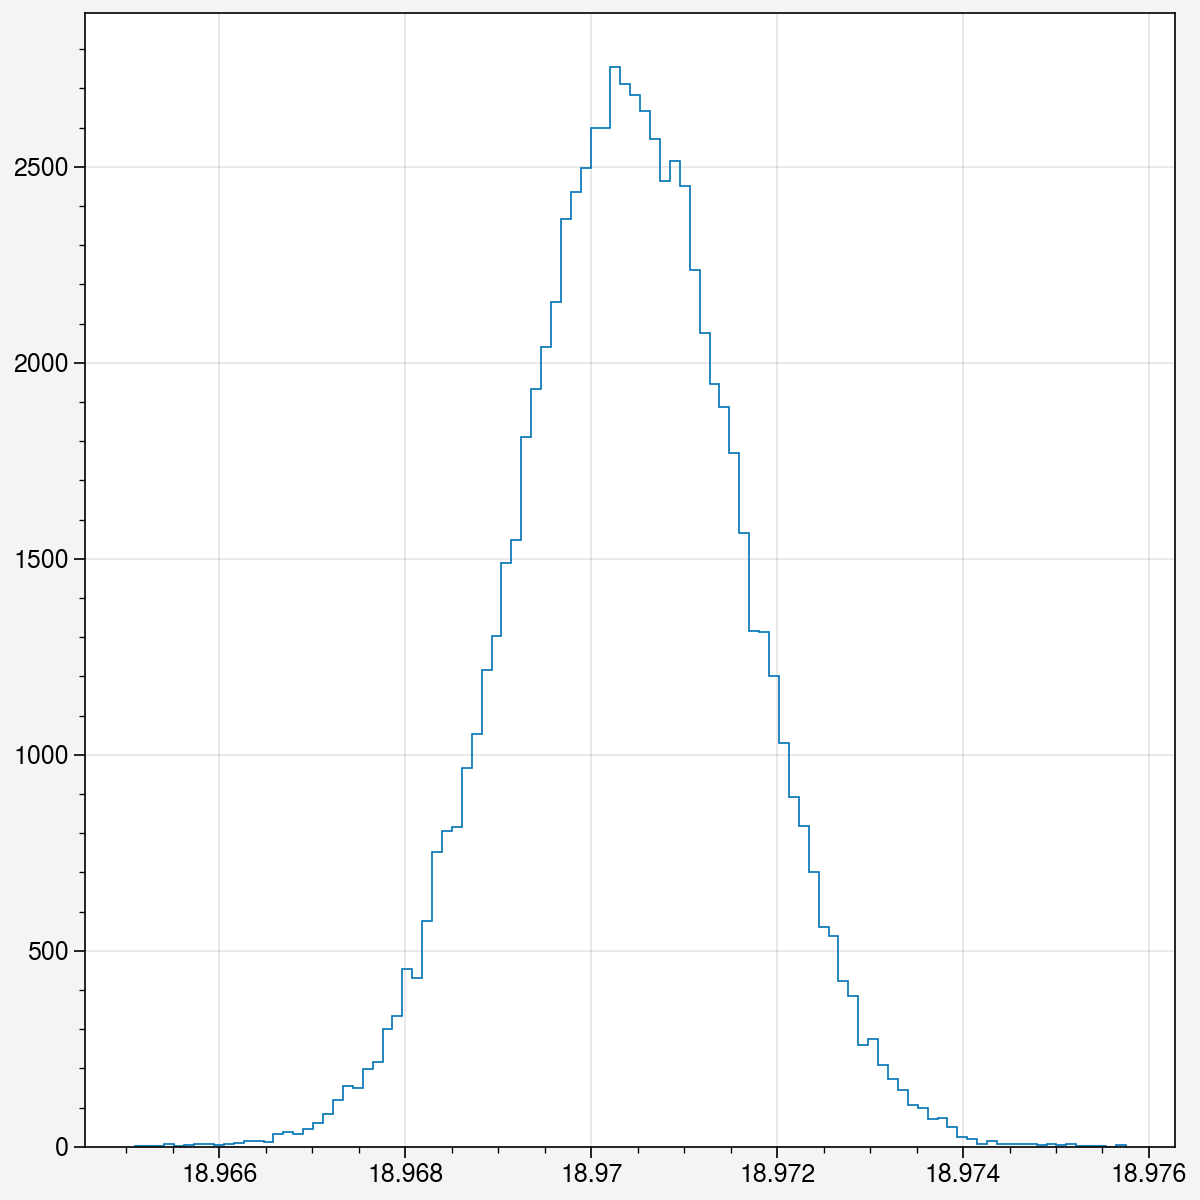

In [31]:
fig,ax = pplt.subplots(nrows=1, ncols=1, figsize=(6,6), sharex=False, sharey=False)
h = ax.hist(mag_r[msk], bins=100, histtype='step')

In [18]:
d_pgauss_riz = fio.read('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/mdet_stats_pgauss_riz_1267tiles.fits')
d_wmom_riz = fio.read('/global/cscratch1/sd/myamamot/metadetect/cuts_final/riz/wmom/DES0209-1124_r5936p01_metadetect.fits')

In [19]:
d_pgauss_riz.dtype, d_wmom_riz.dtype

(dtype([('ra', '>f8'), ('psfrec_g_1', '>f8'), ('psfrec_g_2', '>f8'), ('psfrec_T', '>f8'), ('pgauss_s2n', '>f8'), ('pgauss_T', '>f8'), ('pgauss_T_ratio', '>f8'), ('pgauss_g_1', '>f8'), ('pgauss_g_2', '>f8'), ('dec', '>f8'), ('pgauss_g_cov_1_1', '>f8'), ('pgauss_g_cov_2_2', '>f8'), ('g-r', '>f8'), ('r-i', '>f8'), ('i-z', '>f8'), ('pgauss_T_err', '>f8'), ('pgauss_band_flux_g', '>f8'), ('pgauss_band_flux_r', '>f8'), ('pgauss_band_flux_i', '>f8'), ('pgauss_band_flux_z', '>f8')]),
 dtype([('slice_id', '>i8'), ('mdet_step', '<U7'), ('ra', '>f8'), ('dec', '>f8'), ('ra_noshear', '>f8'), ('dec_noshear', '>f8'), ('y_noshear', '>f8'), ('x_noshear', '>f8'), ('y', '>f8'), ('x', '>f8'), ('slice_y', '>f8'), ('slice_x', '>f8'), ('slice_y_noshear', '>f8'), ('slice_x_noshear', '>f8'), ('hpix_16384', '>i8'), ('hpix_16384_noshear', '>i8'), ('filename', '<U37'), ('tilename', '<U12'), ('mask_flags', '>i4'), ('mask_flags_noshear', '>i4'), ('nepoch_g', '>i4'), ('nepoch_r', '>i4'), ('nepoch_i', '>i4'), ('nepoch

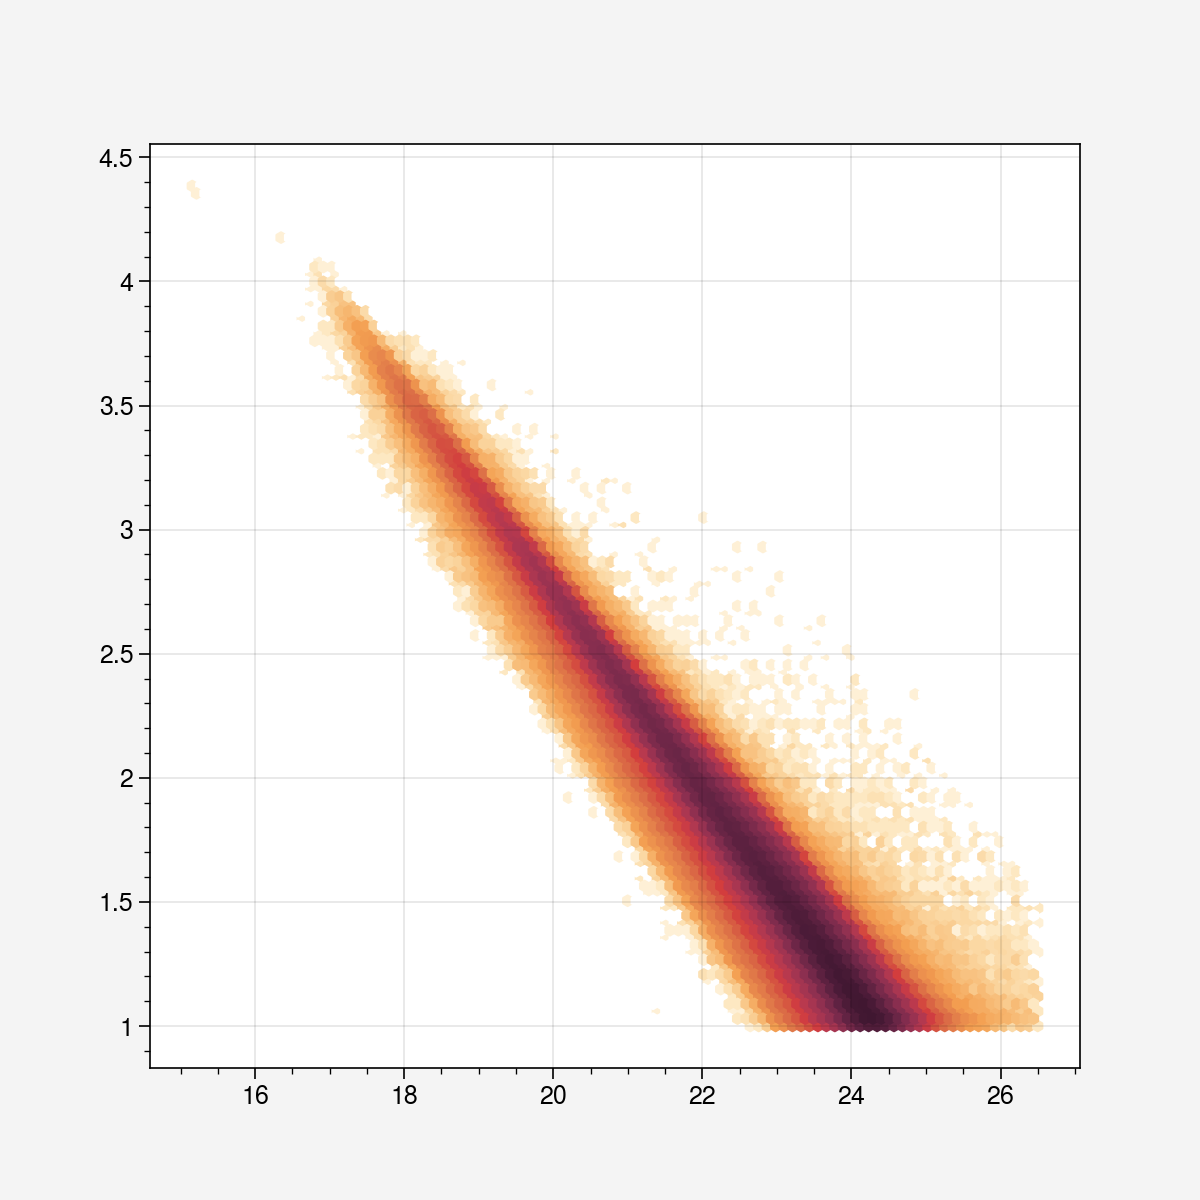

In [12]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6), sharex=False, sharey=False)
mdet_mag_r = 30.0 - 2.5*np.log10(d_pgauss_riz["pgauss_band_flux_r"])
ax.hexbin(mdet_mag_r, np.log10(d_pgauss_riz['pgauss_s2n']), bins='log')

(array([4.07317139e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.14634277e-02, 0.00000000e+00, 8.14634277e-02, 8.14634277e-02,
        0.00000000e+00, 8.14634277e-02, 8.14634277e-02, 4.07317139e-02,
        0.00000000e+00, 8.14634277e-02, 0.00000000e+00, 8.14634277e-02,
        1.22195142e-01, 1.22195142e-01, 1.22195142e-01, 0.00000000e+00,
        2.76975654e-01, 4.88780566e-02, 3.01414683e-01, 2.03658569e-01,
        5.53951309e-01, 2.85121997e-01, 2.93268340e-01, 3.50292739e-01,
        4.56195195e-01, 3.34000054e-01, 6.92439136e-01, 5.62097651e-01,
        8.06487935e-01, 6.59853765e-01, 1.09160993e+00, 9.12390391e-01,
        1.13234165e+00, 1.10790262e+00, 1.23824410e+00, 1.73517101e+00,
        1.92253689e+00, 1.84921981e+00, 1.97141495e+00, 2.07731741e+00,
        2.06102472e+00, 2.10990278e+00, 2.53351260e+00, 2.37058575e+00,
        3.42961031e+00, 3.69843962e+00, 3.72287865e+00, 4.22795190e+00,
        4.39087875e+00, 4.74931784e+00, 5.01814715e+00, 5.042586

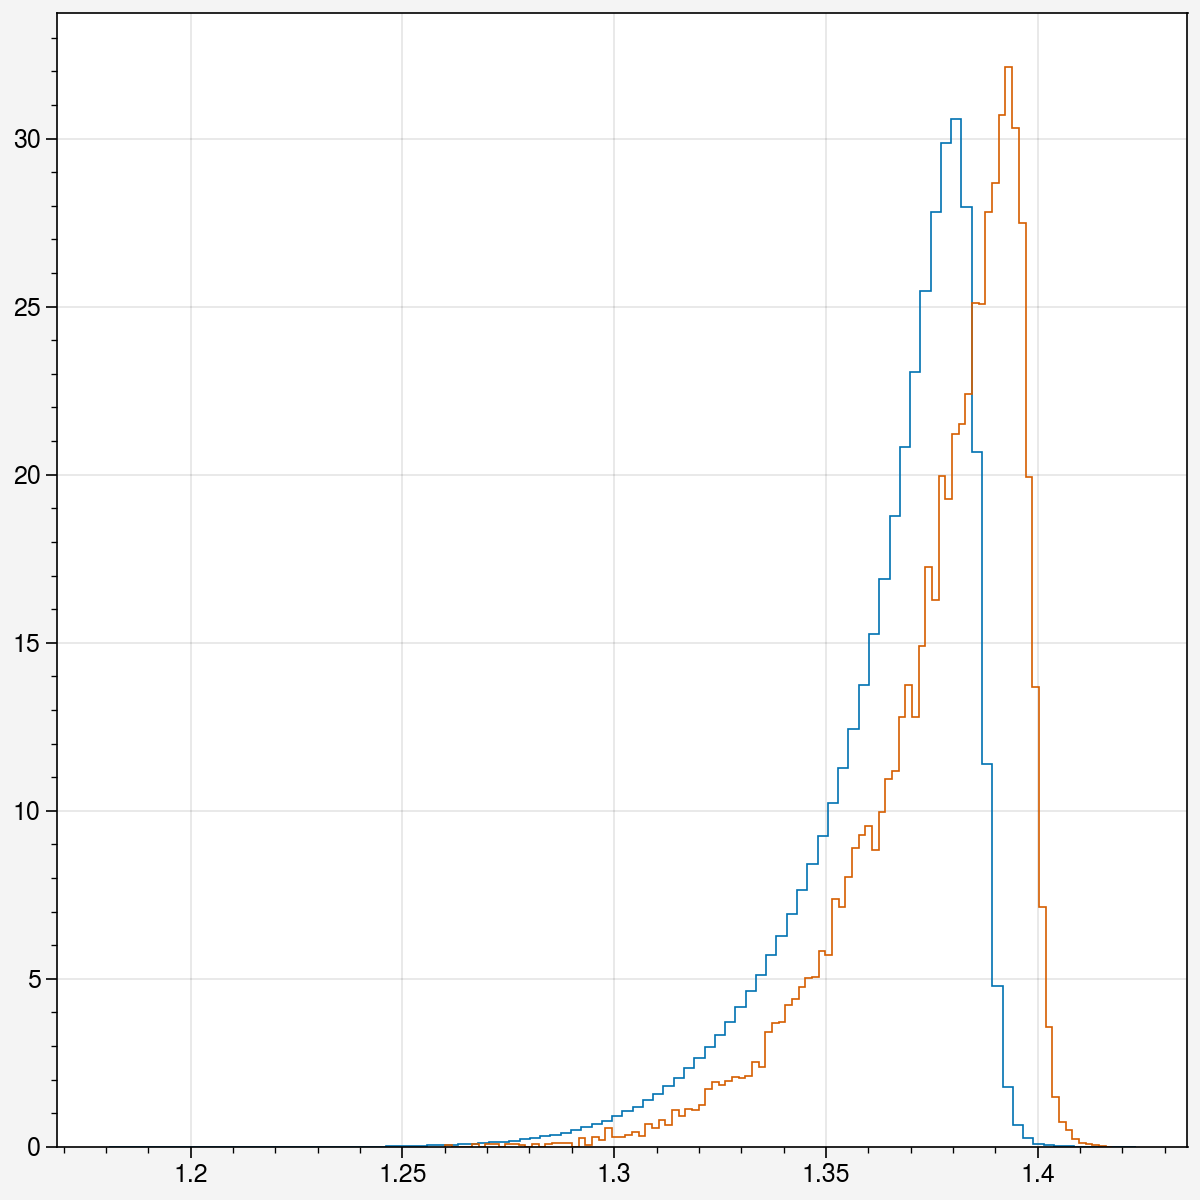

In [22]:
fig,ax = pplt.subplots(nrows=1, ncols=1, figsize=(6,6), sharex=False, sharey=False)
pgauss_mag_r = 30.0 - 2.5*np.log10(d_pgauss_riz["pgauss_band_flux_r"])
wmom_mag_r = 30.0 - 2.5*np.log10(d_wmom_riz["wmom_band_flux_r"])
ax.hist(np.log10(pgauss_mag_r), bins=100, histtype='step', density=True)
ax.hist(np.log10(wmom_mag_r), bins=100, histtype='step', density=True)

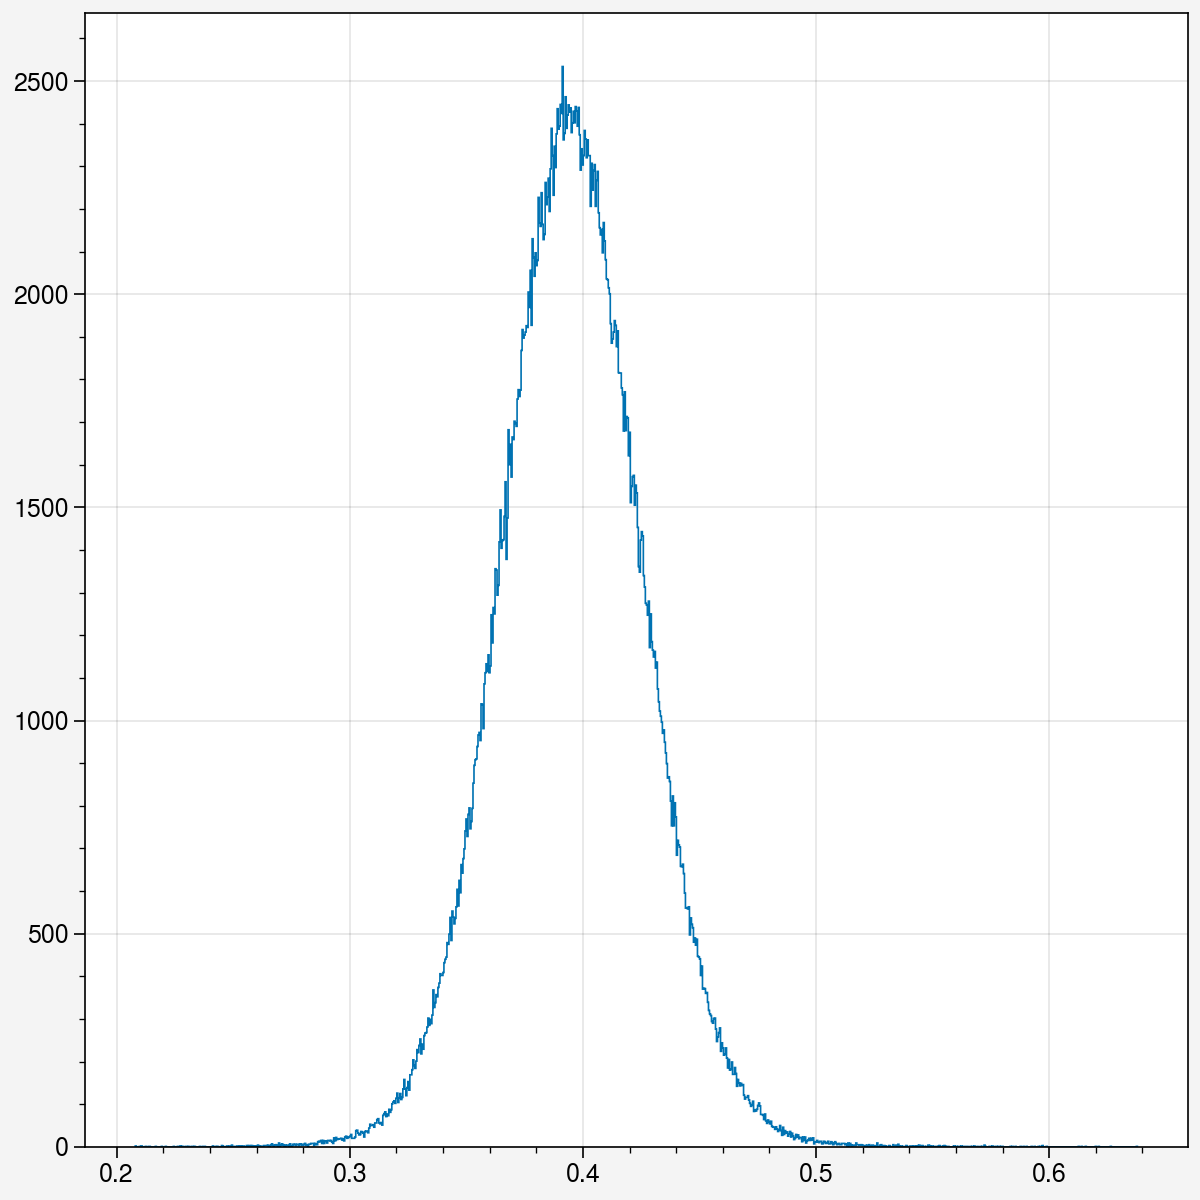

In [51]:
fig,ax = pplt.subplots(nrows=1, ncols=1, figsize=(6,6))
h = ax.hist(d_msk['pgauss_T_ratio'], bins=1000, histtype='step')